In [1]:
import pandas as pd
import numpy as np
import pylab as pl

from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import warnings
%matplotlib inline

In [2]:
data = pd.read_csv('../data/California_merged_data.csv')

In [3]:
data.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,country,description,designation,points,price,province,region_1,...,variety,winery,province_id,variety_numerical,vintage,norm_vintage,norm_price,norm_points,total_fires,sum_fire_size
0,0,10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,...,Cabernet Sauvignon,Kirkland Signature,7,80,2011,0.009921,0.006955,0.070707,0,0.00
1,3,23,23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,...,Merlot,Bianchi,7,326,2011,0.009921,0.008445,0.070707,0,0.00
2,4,25,25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,...,Pinot Noir,Castello di Amorosa,7,440,2011,0.009921,0.031793,0.070707,0,0.00
3,12,60,60,US,"Syrupy and dense, this wine is jammy in plum a...",Estate,86,100.0,California,Napa Valley,...,Cabernet Sauvignon,Okapi,7,80,2013,0.010913,0.047193,0.060606,50,276.17
4,13,63,64,US,There are intriguing touches to the nose of th...,Golden Horn,86,26.0,California,Santa Ynez Valley,...,Sauvignon Blanc,Sevtap,7,514,2015,0.011905,0.010432,0.060606,0,0.00


In [4]:
len(pd.unique(data['winery']))

1858

In [5]:
l = [[data.sum_fire_size, data.total_fires, data.norm_price, data.norm_points, data.norm_vintage]]

In [6]:
y = ['sum_fire_size', 'total_fires', 'norm_price', 'norm_points', 'norm_vintage']

In [7]:
# Helper function to count the number of samples in each cluster

def label_count(labels):

	lab_count = dict()

	for x in labels:
		if x in lab_count:
			lab_count[x] += 1
		else:
			lab_count[x] = 1

	print(lab_count)

	return

In [8]:
x = data.loc[:, ['variety_numerical', 'price', 'vintage']]
y = data.loc[:, ['points']]

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.20, random_state=0)

In [9]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
predict = clf.predict(x_test)

In [10]:
matched = 0
for i in range(len(predict)):
    if(predict[i] == int(y_test.iloc[i])):
        matched += 1;

print(matched/len(predict))

0.19580696202531644


In [11]:
accuracy_score(y_test, predict)

0.19580696202531644

(array([  20.,    0.,   19.,    0.,    0.,   70.,    0.,    0.,  118.,
           0.,    0.,  235.,    0.,    0.,  417.,    0.,    0.,  735.,
           0.,    0., 1032.,    0.,    0., 1560.,    0.,    0.,  962.,
           0.,    0., 1990.,    0.,    0., 1720.,    0.,    0., 1518.,
           0.,    0., 1234.,    0.,    0.,  700.,    0.,    0.,  222.,
           0.,    0.,   55.,    0.,    0.,   17.,    0.,    0.,   12.,
           0.,    2.]),
 array([80.        , 80.33928571, 80.67857143, 81.01785714, 81.35714286,
        81.69642857, 82.03571429, 82.375     , 82.71428571, 83.05357143,
        83.39285714, 83.73214286, 84.07142857, 84.41071429, 84.75      ,
        85.08928571, 85.42857143, 85.76785714, 86.10714286, 86.44642857,
        86.78571429, 87.125     , 87.46428571, 87.80357143, 88.14285714,
        88.48214286, 88.82142857, 89.16071429, 89.5       , 89.83928571,
        90.17857143, 90.51785714, 90.85714286, 91.19642857, 91.53571429,
        91.875     , 92.21428571, 92.55

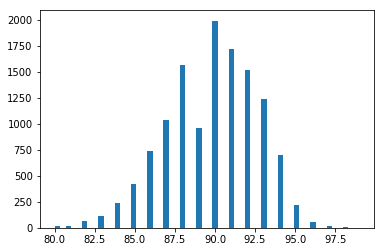

In [12]:
plt.hist(data['points'], bins='auto') 

In [13]:
points = data.loc[:,'points']
points = np.array(points, dtype=pd.Series)
points = points.reshape(-1, 1)
cluster = KMeans(n_clusters = 3, random_state = 0).fit(points)
point_bins = cluster.labels_

data['point_bin'] = point_bins

In [14]:
label_count(point_bins)

{0: 4206, 2: 4672, 1: 3760}


In [15]:
x = data.loc[:, ['variety_numerical', 'price', 'vintage']]
y = data.loc[:, ['point_bin']]

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.20, random_state=0)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
predict = clf.predict(x_test)

accuracy_score(y_test, predict)

0.5075158227848101